In [1]:
cd ../..

/home/users/cdonoso/astromer/ASTROMER


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import sys,os
sys.path.append(os.path.realpath('../..'))
from core.data import pretraining_records, clf_records

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# ASTROMER input format

In [12]:
dataset_name = 'new_alcock'
dataset = pretraining_records('./data/records/{}/fold_0/{}/train/'.format(dataset_name, dataset_name), 
                              2000, max_obs=200, 
                              msk_frac=0.5, rnd_frac=0.2, same_frac=0.2,
                              sampling=False, shuffle=True)

In [13]:
objects = pd.read_csv('./data/records/{}/fold_0/{}/objects.csv'.format(dataset_name, dataset_name))
objects

,label,size
0,Cep_0,1082
1,Cep_1,583
2,EC,6724
3,LPV,2946
4,RRab,7297
5,RRc,1662


In [14]:
# delta_list = []
# delta_std_list = []
# for x in dataset:
#     delta = tf.reduce_mean(x['times'][:, 1:] - x['times'][:, :-1])
#     std = tf.math.reduce_std(x['times'][:, 1:] - x['times'][:, :-1])
#     delta_list.append(delta)
#     delta_std_list.append(std)

In [15]:
# tf.reduce_mean(delta_list), tf.reduce_mean(delta_std_list)

In [17]:
# for batch in dataset:
#     print(batch['input'].shape)

2022-01-07 18:53:16.371770: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


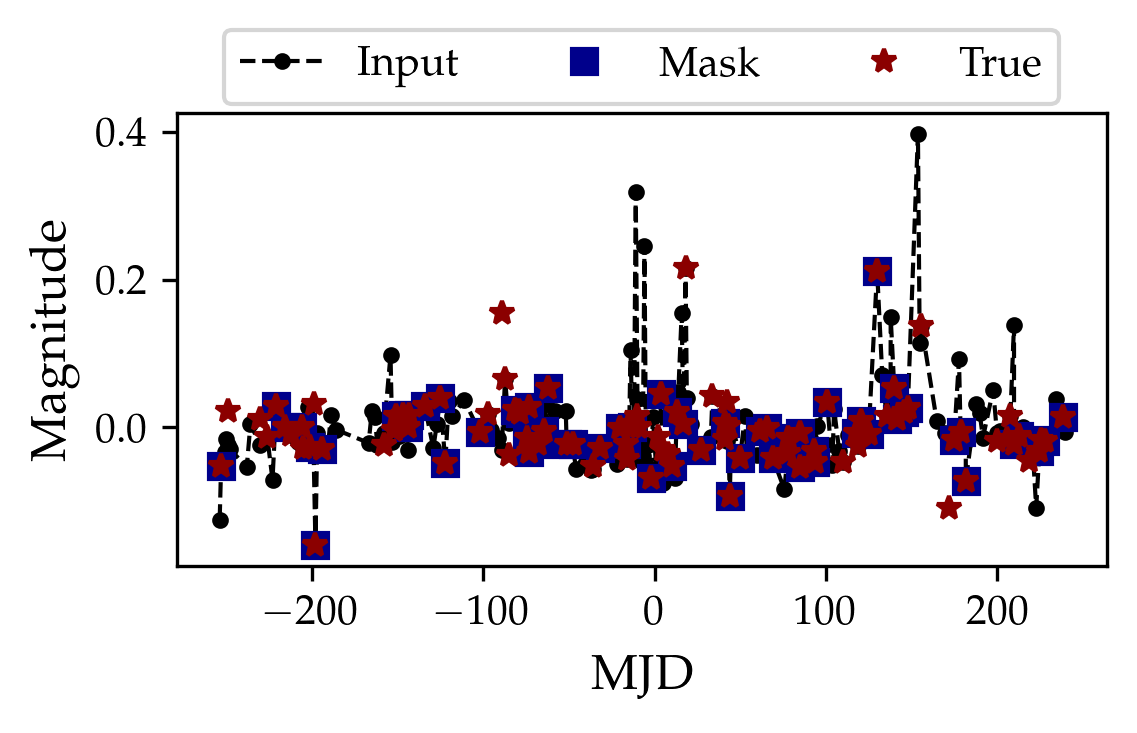

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(4,2), sharex=True, sharey=True, 
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, dpi=300)
lim = 200
for batch in dataset:

    x_input  = batch['input'][-1][:lim]
    x_output = batch['output'][-1][:lim]
    t_sample = batch['times'][-1][:lim]
    
    mask_in  = tf.squeeze(batch['mask_in'][-1][:lim])
    mask_out = tf.squeeze(batch['mask_out'][-1][:lim])
    

    times_masked = tf.boolean_mask(t_sample, mask_in)
    serie_masked = tf.boolean_mask(x_input, mask_in)
    

    times_masked_out = tf.boolean_mask(t_sample, mask_out)
    serie_masked_out = tf.boolean_mask(x_input, mask_out)
        
    axes.plot(t_sample, x_output, color='k', linestyle='--', marker='.', label='Input', linewidth=1)
    axes.plot(times_masked, serie_masked, marker='s', linestyle='', color='darkblue', label='Mask', linewidth=1)
    axes.plot(times_masked_out, serie_masked_out, color='darkred', linestyle='', marker='*', label='True', linewidth=1)

    axes.set_xlabel('MJD', fontsize=12)
    axes.set_ylabel('Magnitude', fontsize=12)    
    axes.legend(ncol=3, bbox_to_anchor=(0.97, 1.23))
    break
# fig.savefig('presentation/figures/input.png', transparent=True)
# fig.savefig('presentation/figures/input.pdf', format='pdf', bbox_inches='tight')

In [58]:
fig.savefig('./presentation/figures/input.pdf', format='pdf')

# Classification input 

In [18]:
cd astromer/ASTROMER/

/home/users/cdonoso/astromer/ASTROMER


In [19]:
import tensorflow as tf 
import os, sys

sys.path.append(os.path.realpath('../..'))

from core.data import pretraining_records

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
dataset = pretraining_records('./data/records/huge/train/', 3000, max_obs=200, 
                              msk_frac=0., rnd_frac=0., same_frac=0.,
                              sampling=False, shuffle=False)

In [69]:
tf.reduce_sum([batch['input'].shape[0] for batch in dataset])

<tf.Tensor: shape=(), dtype=int32, numpy=4295606>

In [37]:
df_labels = pd.read_csv('./data/records/alcock/objects.csv')
class_names = df_labels['label'].values
class_names = [x.replace('_', '\_') for x in class_names]

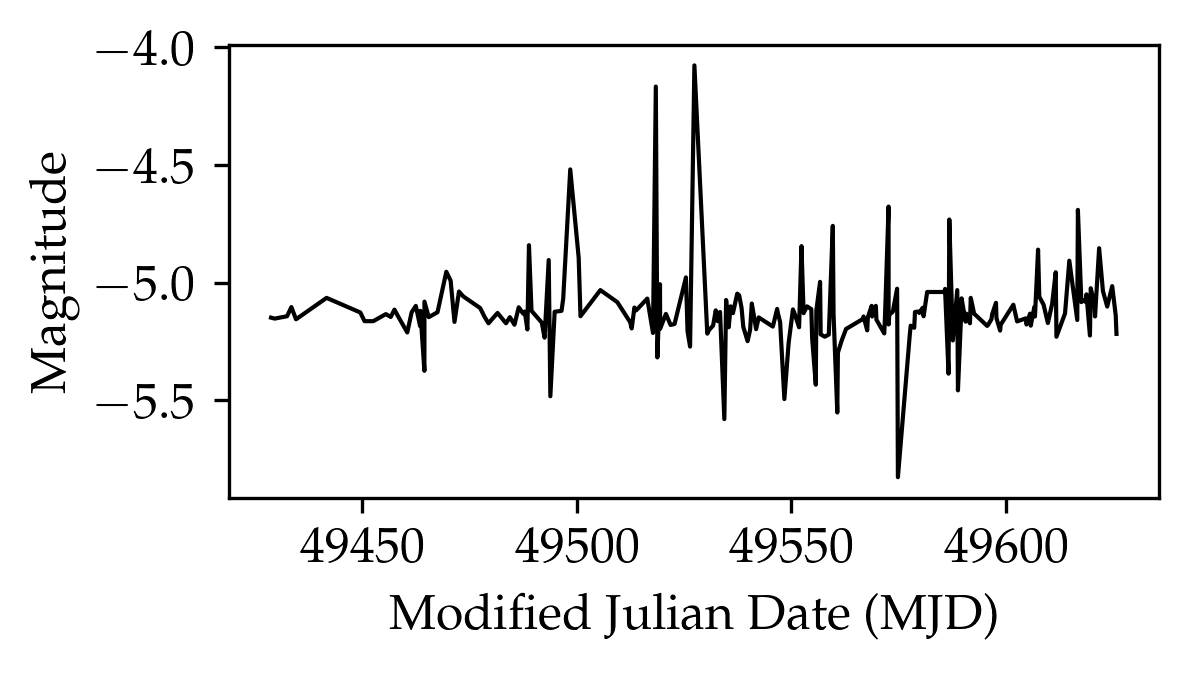

2021-12-23 20:13:21.625634: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [59]:
plt.rcParams.update({'font.size': 12})
for batch in dataset:
    y_label  = batch['label'][-1]
    x_input  = batch['input'][-1]
    t_sample = batch['times'][-1]
    
    mask_in  = tf.squeeze(batch['mask_in'][-1])
    mask_out = tf.squeeze(batch['mask_out'][-1])

    times_masked = tf.boolean_mask(t_sample, mask_in)
    serie_masked = tf.boolean_mask(x_input, mask_in)
    
    # BATCH DISTRIBUTION
#     plt.figure(figsize=(5,2), dpi=100)
#     batch_labels = batch['label'].numpy()
#     uniques, counts = np.unique(batch_labels, return_counts=True)
#     x = range(len(uniques))
#     plt.bar(x, counts)
#     plt.xticks(x, class_names[:len(uniques)])
#     plt.title('Batch distribution')
#     plt.xlabel('Class')
#     plt.ylabel('Counts')
#     plt.show()
    
    # Lightcurve
    fig, axes = plt.subplots(1, 1, figsize=(4,2), sharex=True, sharey=True, 
                             gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, dpi=300)
    axes.plot(t_sample, x_input, color='k', linestyle='-', marker='', label='Input', linewidth=1)
#     axes.set_title('{}'.format(str(class_names[y_label])))
    axes.set_xlabel('Modified Julian Date (MJD)')
    axes.set_ylabel('Magnitude')   
    fig.savefig('presentation/figures/raw_input.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    break